<a href="https://colab.research.google.com/github/amirrhseiin/Traffic-Signs-Recognition/blob/main/Traffic_sign_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cv2
import numpy as np
import csv
#from skimage import exposure
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.optimizers import SGD
from keras import Model
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from imblearn.under_sampling import RandomUnderSampler
import random
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline

In [ ]:
train_data = pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\train.pickle')
test_data= pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\test.pickle')
valid_data= pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\valid.pickle')

Y_train= train_data['labels']
X_train= train_data['features']
Y_train=to_categorical(Y_train)

Y_valid= valid_data['labels']
X_valid= valid_data['features']
Y_valid=to_categorical(Y_valid)

Y_test= test_data['labels']
X_test= test_data['features']


Y_train.astype('uint8')
Y_valid.astype('uint8')
Y_test.astype('uint8')


array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

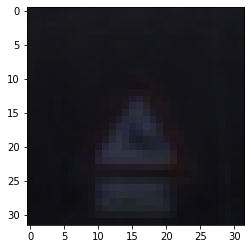

In [ ]:
img=X_train[278]
plt.imshow(img)

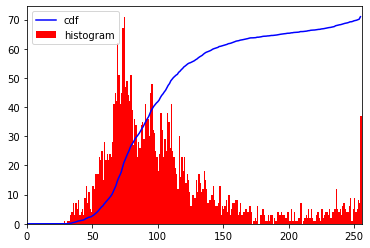

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
img=X_train[10899]
clache= cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
r, g, b=cv2.split(img)
r_channel= clache.apply(np.uint8(r))
g_channel= clache.apply(np.uint8(g))
b_channel= clache.apply(np.uint8(b))
equ=cv2.merge((r_channel,g_channel,b_channel))
equ.shape


(32, 32, 3)

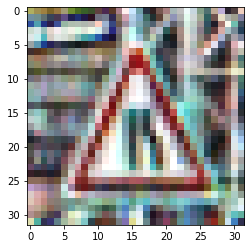

In [ ]:
plt.imshow(equ)

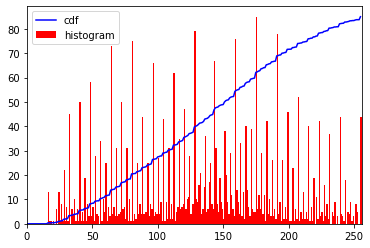

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()